In [1]:
import intake
import allel
import numpy as np
import matplotlib.pyplot as plt
from dask_kubernetes import KubeCluster
from dask.distributed import Client
import pandas as pd
%matplotlib inline

In [2]:
cluster = KubeCluster(n_workers=20)
client = Client(cluster)
client

distributed.scheduler - INFO - Clear task state
distributed.scheduler - INFO -   Scheduler at:    tcp://10.33.64.2:41475
distributed.scheduler - INFO -   dashboard at:                     :8787
distributed.scheduler - INFO - Receive client connection: Client-e339b426-c062-11ea-82b2-626d207ed5cb
distributed.core - INFO - Starting established connection


Client Scheduler: tcp://10.33.64.2:41475 Dashboard: /user/alimanfoo@googlemail.com/proxy/8787/status,Cluster Workers: 0 Cores: 0 Memory: 0 B


distributed.scheduler - INFO - Register tcp://10.33.66.4:36917
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.66.4:36917
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.84.4:32825
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.84.4:32825
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.79.4:43587
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.79.4:43587
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.71.4:40297
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.71.4:40297
distributed.core - INFO - Starting established connection
distributed.scheduler - INFO - Register tcp://10.33.75.4:42245
distributed.scheduler - INFO - Starting worker compute stream, tcp://10.33.75.4:42245
distributed.core - INFO

In [3]:
cat = intake.open_catalog('https://malariagen.github.io/intake/gcs.yml')
cat

gcs:
  args:
    path: https://malariagen.github.io/intake/gcs.yml
  description: ''
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    version: 1


In [4]:
ag2 = cat.ag2
ag2

ag2:
  args:
    path: https://malariagen.github.io/intake/gcs/ag2.yml
  description: 'The MalariaGEN Anopheles gambiae 1000 Genomes Project phase 2 data
    resource. Please note that data included in these catalogs are made available
    prior to publication and subject to the Ag1000G terms of use - https://www.malariagen.net/data/terms-use/ag1000g-terms-use.
    For more information about this data resource see https://www.malariagen.net/resource/27.

    '
  driver: intake.catalog.local.YAMLFileCatalog
  metadata:
    catalog_dir: https://malariagen.github.io/intake


In [5]:
df_samples = ag2.samples.read()
df_samples

/opt/conda/lib/python3.7/site-packages/dask/dataframe/utils.py:14: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,ox_code,src_code,population,country,location,site,contributor,contact,year,m_s,sex,n_sequences,mean_coverage,ebi_sample_acc,latitude,longitude
0,AA0040-C,Twifo_Praso__E2,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95033368,30.99,ERS311878,5.60858,-1.54926
1,AA0041-C,Twifo_Praso__H3,GHcol,Ghana,Twifo Praso,Twifo Praso,David Weetman,David Weetman,2012,M,F,95843804,31.70,ERS311886,5.60858,-1.54926
2,AA0042-C,Takoradi_C7,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,107420666,35.65,ERS311894,4.91217,-1.77397
3,AA0043-C,Takoradi_H8,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,95993752,29.46,ERS311902,4.91217,-1.77397
4,AA0044-C,Takoradi_D10,GHcol,Ghana,Takoradi,Takoradi,David Weetman,David Weetman,2012,M,F,103044262,33.67,ERS311910,4.91217,-1.77397
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1137,AY0087-C,Tia_dPM_46,CIcol,Cote d'Ivoire,Tiassale,Tiassale,David Weetman,David Weetman,2012,M,F,101458232,32.56,ERS311822,5.89839,-4.82293
1138,AY0088-C,Tia_dPM_52,CIcol,Cote d'Ivoire,Tiassale,Tiassale,David Weetman,David Weetman,2012,M,F,95140584,30.75,ERS311830,5.89839,-4.82293
1139,AY0089-C,Tia_aPM_4,CIcol,Cote d'Ivoire,Tiassale,Tiassale,David Weetman,David Weetman,2012,M,F,92383724,29.04,ERS311838,5.89839,-4.82293
1140,AY0090-C,Tia_aPM_13,CIcol,Cote d'Ivoire,Tiassale,Tiassale,David Weetman,David Weetman,2012,M,F,96210618,30.94,ERS311846,5.89839,-4.82293


In [6]:
df_samples.population.value_counts()

CMgam    297
UGgam    112
BFgam     92
GW        91
AOcol     78
BFcol     75
CIcol     71
GAgam     69
GM        65
GHcol     55
KE        48
GNgam     40
FRgam     24
GHgam     12
GQgam      9
GNcol      4
Name: population, dtype: int64

In [7]:
import functools

In [8]:
@functools.lru_cache(maxsize=None)
def compute_fst(pop1, pop2, n1, n2, seq_id, seq_start, seq_stop, blen, seed):
    print(pop1, pop2, n1, n2, seq_id, seq_start, seq_stop, blen, seed)

    np.random.seed(seed)

    idx1 = df_samples.loc[df_samples.population == pop1].index.values
    idx2 = df_samples.loc[df_samples.population == pop2].index.values

    if n1:
        idx1_sub = np.random.choice(idx1, n1, replace=False)
        idx1_sub.sort()
    else:
        idx1_sub = idx1
    if n2:
        idx2_sub = np.random.choice(idx2, n2, replace=False)
        idx2_sub.sort()
    else:
        idx2_sub = idx2

    callset = ag2.snps_pass_biallelic.to_zarr()
    pos = allel.SortedIndex(callset[seq_id]['variants/POS'])
    gt = allel.GenotypeDaskArray(callset[seq_id]['calldata/GT'])

    loc_region = pos.locate_range(seq_start, seq_stop)
    pos_region = pos[loc_region]
    gt_region = gt[loc_region]

    ac1 = gt_region.take(idx1_sub, axis=1).count_alleles(max_allele=1).compute()
    ac2 = gt_region.take(idx2_sub, axis=1).count_alleles(max_allele=1).compute()

    ac = ac1 + ac2
    loc_seg = ac.is_segregating()
    ac1_seg = ac1[loc_seg]
    ac2_seg = ac2[loc_seg]

    # compute fst
    fst, se, vb, vj = allel.average_hudson_fst(ac1_seg, ac2_seg, blen)
    
    return fst, se


In [37]:
import seaborn as sns
sns.set_context('paper')

In [62]:
def compare(pop1, pop2, x, seq_id='3R', seq_start=1_000_000, seq_stop=37_000_000, blen=20_000, seeds=10):

    # overall average
    fst_true, _ = compute_fst(pop1=pop1, pop2=pop2, n1=None, n2=None, seq_id=seq_id, seq_start=seq_start, seq_stop=seq_stop, blen=blen, seed=None)

    # downsampled averages
    data = {'n': [], 'fst': [], 'se': [], 'seed': []}
    for n in x:
        for seed in range(seeds):
            fst, se = compute_fst(pop1=pop1, pop2=pop2, n1=n, n2=n, seq_id=seq_id, seq_start=seq_start, seq_stop=seq_stop, blen=blen, seed=seed)
            data['n'].append(n)
            data['fst'].append(fst)
            data['se'].append(se)
            data['seed'].append(seed)
    data = pd.DataFrame(data)
    data['error'] = np.abs(fst_true - data['fst'])
    data['delta_error'] = data['error'] - data['se']

    fig, axs = plt.subplots(nrows=1, ncols=2, facecolor='w', figsize=(9, 4))
    
    ax = axs[0]
    ym = data.groupby('n').fst.mean()
    ax.plot(ym.index, ym, 'k-')
    ax.scatter(data['n'], data['fst'], zorder=10)
    ax.axhline(fst_true, color='k', linestyle='--', zorder=1)
    ax.set_ylim(bottom=0)
    ax.set_xlabel('Sample size')
    ax.set_ylabel('$F_{ST}$ (Hudson)')
    ax.set_title(f'{pop1} vs. {pop2}')
    ax.grid(zorder=-20)

    ax = axs[1]
    ax.scatter(data['n'], data['delta_error'], zorder=10)
    ax.axhline(0, color='k', linestyle='--', zorder=1)
    ax.set_xlabel('Sample size')
    ax.set_ylabel('True error - estimated error')  
    ax.set_title(f'{pop1} vs. {pop2}')
    ax.grid(zorder=-20)

    fig.tight_layout()
    
    return data


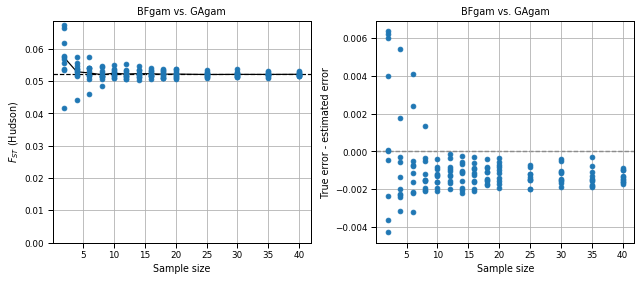

In [63]:
x = np.concatenate([np.arange(2, 20, 2), np.arange(20, 45, 5)])
pop1 = 'BFgam'
pop2 = 'GAgam'
compare(pop1, pop2, x);

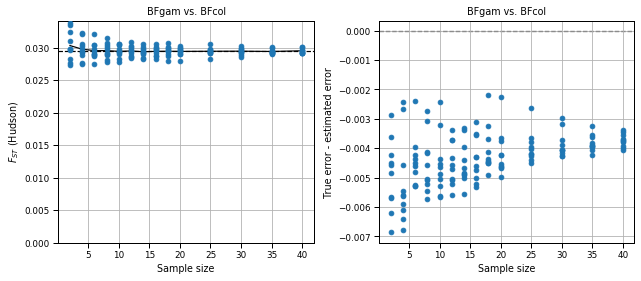

In [64]:
x = np.concatenate([np.arange(2, 20, 2), np.arange(20, 45, 5)])
pop1 = 'BFgam'
pop2 = 'BFcol'
compare(pop1, pop2, x);

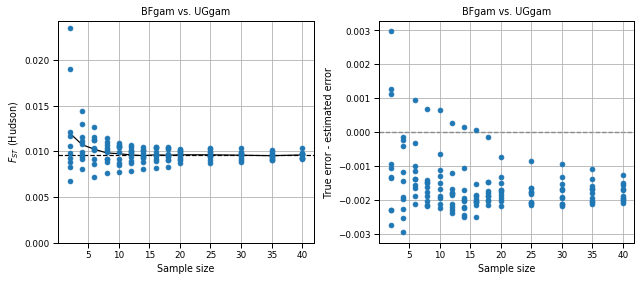

In [65]:
x = np.concatenate([np.arange(2, 20, 2), np.arange(20, 45, 5)])
pop1 = 'BFgam'
pop2 = 'UGgam'
compare(pop1, pop2, x);

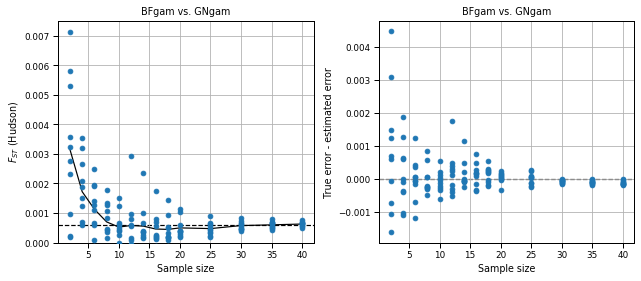

In [66]:
x = np.concatenate([np.arange(2, 20, 2), np.arange(20, 45, 5)])
pop1 = 'BFgam'
pop2 = 'GNgam'
compare(pop1, pop2, x);